In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import socket

In [2]:
df=pd.read_excel("Final_Train.xlsx")

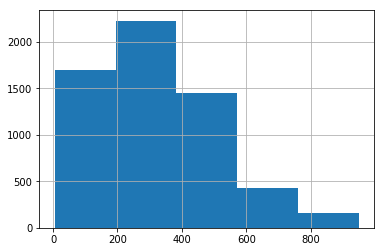

In [3]:
df['Fees'].hist(bins=5)

In [4]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [11]:
df.Miscellaneous_Info.value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                                  40
Tooth Extraction Dental Fillings Scaling / Polishing                                                12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                               12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment                 9
Skin Allergy Treatment Skin Allergies Dermabrasion                                                   9
Cosmetic/ Aesthetic Dentistry Crowns and Bridges Fixing Complete/Partial Dentures Fixing             8
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                                              8
Acrylic Partial Denture Artificial Teeth BPS Dentures Fixing                                         7
Skin Care Bacterial Skin Infection Treatment skin checks                                             7
Laser Resurfacing Scar Treatment Wart Removal                            

In [5]:
df['years_exp'] = df['Experience'].str.slice(stop=2).astype(int)

In [6]:
df.years_exp

0       24
1       12
2        9
3       12
4       20
5        8
6       42
7       10
8       14
9       23
10       5
11       7
12       9
13      21
14      12
15      10
16      24
17       5
18      19
19      19
20      21
21      14
22      41
23      31
24      23
25       5
26      25
27      12
28      16
29      15
        ..
5931    13
5932     9
5933    21
5934    19
5935    12
5936    34
5937    19
5938    36
5939     7
5940    40
5941    30
5942    51
5943     3
5944     2
5945     4
5946    12
5947     6
5948    15
5949     8
5950     4
5951     4
5952    47
5953    35
5954    31
5955    10
5956    19
5957    33
5958    41
5959    15
5960    17
Name: years_exp, Length: 5961, dtype: int64

In [3169]:
df.describe()

,Fees,years_exp
count,5961.000000,5961.000000
mean,307.944640,17.303976
std,190.920373,11.142798
min,5.000000,0.000000
25%,150.000000,9.000000
50%,300.000000,14.000000
75%,500.000000,23.000000
max,950.000000,66.000000


In [3170]:
df['City'] = df['Place'].str.split(',').str[1]
df['Locality'] = df['Place'].str.split(',').str[0]

In [3171]:
df['Qual_1'] = df['Qualification'].str.split(',').str[0]
df['Qual_2'] = df['Qualification'].str.split(',').str[1]
df['Qual_3'] = df['Qualification'].str.split(',').str[2]

In [8]:
df.Miscellaneous_Info.head(10)

0                 100% 16 Feedback Kakkanad, Ernakulam
1                98% 76 Feedback Whitefield, Bangalore
2                                                  NaN
3    Bannerghatta Road, Bangalore ₹250 Available on...
4                100% 4 Feedback Keelkattalai, Chennai
5                                                  NaN
6                                                  NaN
7    Dental Fillings Crowns and Bridges Fixing Impa...
8                                                  NaN
9                                                  NaN
Name: Miscellaneous_Info, dtype: object

In [9]:
df['Misc'] = df['Miscellaneous_Info'].str.split('%').str[0]
df.Misc.value_counts()

100                                                                                                                                              335
98                                                                                                                                               138
96                                                                                                                                               133
97                                                                                                                                               132
99                                                                                                                                               120
95                                                                                                                                               104
93                                                                                                        

In [3172]:


df['Misc_len'] = df['Misc'].str.len()

df.loc[df['Misc_len']>3, 'Misc'] = 0

df['Misc'].fillna(0,inplace = True)

df['Misc'] = df['Misc'].astype(int)

df['Misc_2'] = df['Miscellaneous_Info'].str.split('% ').str[1]

df['Misc_3'] = df['Misc_2'].str.split(' ').str[0]

df['Misc_3'].fillna(0,inplace = True)

df['Misc_3_len'] = df['Misc_3'].str.len()

df.loc[df['Misc_3_len']>3, 'Misc_3'] = 0

df.loc[df['Misc_3']==',', 'Misc_3'] = 0

df['Misc_3'] = df['Misc_3'].astype(int)

df['Fees1'] = df['Fees']

df = df.drop(['Fees'],axis=1)

In [3173]:
df['Misc_4'] = df['Misc']*np.log((1+df['Misc_3']))

In [3174]:
df['Rating'].fillna('0%',inplace = True)

In [3175]:
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)

In [3176]:
df['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'], dtype=object)

In [3177]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [3178]:
df.dtypes

Qualification          object
Experience             object
Rating                  int32
Place                  object
Profile                object
Miscellaneous_Info     object
years_exp               int32
City                   object
Locality               object
Qual_1                 object
Qual_2                 object
Qual_3                 object
Misc                    int32
Misc_len              float64
Misc_2                 object
Misc_3                  int32
Misc_3_len            float64
Fees1                   int64
Misc_4                float64
dtype: object

In [3179]:
from sklearn.preprocessing import LabelEncoder

In [3180]:
df['City'].fillna("XXX",inplace = True)
df['Locality'].fillna("XXX",inplace = True)
df['Qualification'].fillna("XXX",inplace = True)
df['Profile'].fillna("XXX",inplace = True)
df['Qual_1'].fillna("XXX",inplace = True)
df['Qual_2'].fillna("XXX",inplace = True)
df['Qual_3'].fillna("XXX",inplace = True)

In [3181]:
lb_City = LabelEncoder()
df["City_code"] = lb_City.fit_transform(df["City"])

In [3182]:
lb_Locality = LabelEncoder()
df["Locality_code"] = lb_Locality.fit_transform(df["Locality"])

In [3183]:
lb_qual_1 = LabelEncoder()
df["Qual_1_code"] = lb_Locality.fit_transform(df["Qual_1"])

In [3184]:
x = df.loc[df['Qual_1'] == 'Get inspired by remarkable stories of people like you', 'Qual_1_code']

In [3185]:
lb_qual_2 = LabelEncoder()
df["Qual_2_code"] = lb_Locality.fit_transform(df["Qual_2"])

In [3186]:
lb_qual_3 = LabelEncoder()
df["Qual_3_code"] = lb_Locality.fit_transform(df["Qual_3"])

In [3187]:
lb_Profile = LabelEncoder()
df["Profile_code"] = lb_Locality.fit_transform(df["Profile"])

In [3188]:
df.dtypes

Qualification          object
Experience             object
Rating                  int32
Place                  object
Profile                object
Miscellaneous_Info     object
years_exp               int32
City                   object
Locality               object
Qual_1                 object
Qual_2                 object
Qual_3                 object
Misc                    int32
Misc_len              float64
Misc_2                 object
Misc_3                  int32
Misc_3_len            float64
Fees1                   int64
Misc_4                float64
City_code               int64
Locality_code           int64
Qual_1_code             int64
Qual_2_code             int64
Qual_3_code             int64
Profile_code            int64
dtype: object

In [3248]:
np.where(df.dtypes != np.float)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 17, 19,
       20, 21, 22, 23, 24], dtype=int64)

In [3189]:
df_xgb = df[['Qual_1_code','Qual_2_code','Qual_3_code','years_exp', 'Rating','Profile_code','Locality_code','City_code','Misc_4','Fees1']]

In [3190]:
#df_xgb = df[['Qual_1_code','Qual_3_code','years_exp','Locality_code','Misc_4','Fees1']]

In [3193]:
X, y = df_xgb.iloc[:,:-1],df_xgb.iloc[:,-1]

In [3194]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [3195]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [3196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [3197]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, n_estimators = 10)

In [3198]:
# xg_reg.fit(X_train,y_train)

# preds = xg_reg.predict(X_test)

In [3199]:
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE: %f" % (rmse))

RMSE: 214.994424


In [3200]:
# params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
#                     num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [3201]:
# cv_results.head()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,335.413666,1.568630,335.342194,0.659724
1,312.566254,1.609778,312.402171,0.559384
2,292.492493,1.496401,292.269511,0.469234
3,275.427877,1.415945,275.089732,0.401313
4,260.615255,1.427818,260.105947,0.388899


In [3202]:
# print((cv_results["test-rmse-mean"]).tail(1))

49    177.275472
Name: test-rmse-mean, dtype: float64


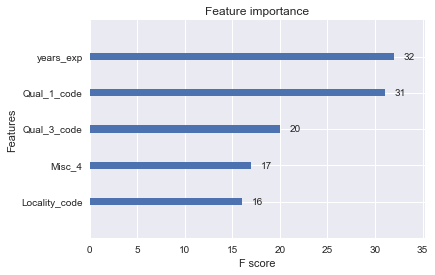

In [3203]:
#xgb.plot_importance(xg_reg)
#plt.rcParams['figure.figsize'] = [5, 5]
# plt.show()

In [3204]:
df_test=pd.read_excel("/Users/sd15068/Downloads/Final Participant Data Folder/Final_Test.xlsx")

In [3205]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [3206]:
df_test['years_exp'] = df_test['Experience'].str.slice(stop=2).astype(int)

In [3207]:
df_test['City'] = df_test['Place'].str.split(',').str[1]
df_test['Locality'] = df_test['Place'].str.split(',').str[0]

In [3208]:
df_test['Rating'].fillna('95%',inplace = True)
df_test['Rating'] = df_test['Rating'].str.slice(stop=-1).astype(int)

In [3209]:
df_test['Qual_1'] = df['Qualification'].str.split(',').str[0]
df_test['Qual_2'] = df['Qualification'].str.split(',').str[1]
df_test['Qual_3'] = df['Qualification'].str.split(',').str[2]

In [3210]:
df_test['City'].fillna("XXX",inplace = True)
df_test['Locality'].fillna("XXX",inplace = True)
df_test['Qual_1'].fillna("XXX",inplace = True)
df_test['Qual_2'].fillna("XXX",inplace = True)
df_test['Qual_3'].fillna("XXX",inplace = True)
df_test['Profile'].fillna("XXX",inplace = True)

In [3211]:
df_test['Misc'] = df_test['Miscellaneous_Info'].str.split('%').str[0]

df_test['Misc_len'] = df_test['Misc'].str.len()

df_test.loc[df_test['Misc_len']>3, 'Misc'] = 0

df_test['Misc'].fillna(0,inplace = True)

df_test['Misc'] = df_test['Misc'].astype(int)

df_test['Misc_2'] = df_test['Miscellaneous_Info'].str.split('% ').str[1]

df_test['Misc_3'] = df_test['Misc_2'].str.split(' ').str[0]

df_test['Misc_3'].fillna(0,inplace = True)

df_test['Misc_3_len'] = df_test['Misc_3'].str.len()

df_test.loc[df_test['Misc_3_len']>3, 'Misc_3'] = 0

df_test.loc[df_test['Misc_3']==',', 'Misc_3'] = 0

df_test['Misc_3'] = df_test['Misc_3'].astype(int)

In [3212]:
df_test['Misc_4'] = df_test['Misc']*np.log(1+df['Misc_3'])

In [3213]:
lb_City = LabelEncoder()
df_test["City_code"] = lb_City.fit_transform(df_test["City"])

In [3214]:
lb_Locality = LabelEncoder()
df_test["Locality_code"] = lb_Locality.fit_transform(df_test["Locality"])

In [3215]:
lb_qual_1 = LabelEncoder()
df_test["Qual_1_code"] = lb_Locality.fit_transform(df_test["Qual_1"])

In [3216]:
lb_qual_2 = LabelEncoder()
df_test["Qual_2_code"] = lb_Locality.fit_transform(df_test["Qual_2"])

In [3217]:
lb_qual_3 = LabelEncoder()
df_test["Qual_3_code"] = lb_Locality.fit_transform(df_test["Qual_3"])

In [3218]:
x = df_test.loc[df['Qual_1'] == 'Get inspired by remarkable stories of people like you', 'Qual_1_code']

In [3219]:
lb_Profile = LabelEncoder()
df_test["Profile_code"] = lb_Locality.fit_transform(df_test["Profile"])

In [3220]:
# df_test_xgb = df_test[['Qual_1_code','Qual_2_code','Qual_3_code','years_exp', 'Rating','Profile_code','Locality_code','City_code','Misc_4']]

In [3221]:
df_test_xgb = df_test[['Qual_1_code','Qual_3_code','years_exp','Locality_code','Misc_4']]

In [3222]:
preds_1 = xg_reg.predict(df_test_xgb)

In [3223]:
preds_1

array([ 182.23080444,  195.23812866,  215.70562744, ...,  216.57286072,
        221.44563293,  216.57286072], dtype=float32)

In [3224]:
df_test_xgb['Fees'] = preds_1

C:\Users\sd15068\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [3225]:
df_test_xgb.head()

,Qual_1_code,Qual_3_code,years_exp,Locality_code,Misc_4,Fees
0,4,191,35,142,0.0,182.230804
1,2,191,31,577,0.0,195.238129
2,41,191,40,212,0.0,215.705627
3,7,191,0,373,0.0,166.066986
4,2,191,16,231,0.0,187.182098


In [3226]:
df_test_xgb.loc[df_test['Qual_1_code'] == 38, 'Fees'] = 100

C:\Users\sd15068\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3227]:
df_test_xgb.to_csv('submission17.csv')

In [3262]:
df.to_csv('df_train.csv')